# Ironhack | Mid-Bootcamp Project - Bank Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.preprocessing import OneHotEncoder, Normalizer, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, mean_squared_error

## Loading dataset

In [2]:
data = pd.read_excel('../files/creditcardmarketing.xlsx')
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [3]:
new_cols = [x.lower().replace(' ', '_').replace('#', '') for x in data.columns]
new_cols

['customer_number',
 'offer_accepted',
 'reward',
 'mailer_type',
 'income_level',
 '_bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 '_credit_cards_held',
 '_homes_owned',
 'household_size',
 'own_your_home',
 'average_balance',
 'q1_balance',
 'q2_balance',
 'q3_balance',
 'q4_balance']

In [4]:
standard_cols = []
for item in new_cols:
    if item[0] == '_':
        standard_cols.append(item[1:])
    else:
        standard_cols.append(item)
standard_cols

['customer_number',
 'offer_accepted',
 'reward',
 'mailer_type',
 'income_level',
 'bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'household_size',
 'own_your_home',
 'average_balance',
 'q1_balance',
 'q2_balance',
 'q3_balance',
 'q4_balance']

In [5]:
data.columns = standard_cols
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [6]:
data.shape

(18000, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [8]:
data.describe(include='all')

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000,18000,18000,18000,18000.000000,18000,18000,18000.000000,18000.000000,18000.000000,18000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
unique,NaN,2,3,2,3,NaN,2,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Air Miles,Postcard,Medium,NaN,No,High,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
freq,NaN,16977,6061,9147,9013,NaN,15322,6071,NaN,NaN,NaN,11655,NaN,NaN,NaN,NaN,NaN
mean,9000.500000,NaN,NaN,NaN,NaN,1.255778,NaN,NaN,1.903500,1.203444,3.499056,NaN,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,NaN,NaN,NaN,NaN,0.472501,NaN,NaN,0.797009,0.427341,1.114182,NaN,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,3.000000,NaN,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,3.000000,NaN,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,4.000000,NaN,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000


In [9]:
# some numerical columns contain a few discrete values. They will be transformed in categorical.

In [10]:
data.isna().sum()/len(data)*100

customer_number         0.000000
offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
bank_accounts_open      0.000000
overdraft_protection    0.000000
credit_rating           0.000000
credit_cards_held       0.000000
homes_owned             0.000000
household_size          0.000000
own_your_home           0.000000
average_balance         0.133333
q1_balance              0.133333
q2_balance              0.133333
q3_balance              0.133333
q4_balance              0.133333
dtype: float64

In [11]:
data[data['average_balance'].isna()]

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
323,324,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3070,3071,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3108,3109,No,Air Miles,Letter,Low,1,No,High,3,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3789,3790,No,Air Miles,Letter,Medium,2,No,High,3,1,3,No,NaN,NaN,NaN,NaN,NaN
5083,5084,No,Points,Letter,Medium,1,No,High,1,1,3,Yes,NaN,NaN,NaN,NaN,NaN
5677,5678,No,Air Miles,Postcard,Low,1,No,Low,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
5689,5690,No,Air Miles,Postcard,Medium,1,No,Medium,3,1,5,No,NaN,NaN,NaN,NaN,NaN
6932,6933,No,Air Miles,Postcard,Medium,1,No,Medium,2,2,4,Yes,NaN,NaN,NaN,NaN,NaN
7787,7788,No,Air Miles,Letter,Low,2,No,Low,1,1,4,Yes,NaN,NaN,NaN,NaN,NaN
7864,7865,No,Cash Back,Postcard,High,2,Yes,Low,2,1,3,No,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [12]:
# These are the numerical columns to be transformed in categoricals:
# bank_accounts_open, credit_cards_held, homes_owned, household_size

# i'll drop column customer_number, since it will not be needed to build the machine learning model

# Since there is a small percentage of nulls in the dataset, i'll drop them entirely

In [13]:
data = data.drop('customer_number', axis=1)
data = data.dropna().reset_index(drop=True)

data['bank_accounts_open'] = data['bank_accounts_open'].astype('object')
data['credit_cards_held'] = data['credit_cards_held'].astype('object')
data['homes_owned'] = data['homes_owned'].astype('object')
data['household_size'] = data['household_size'].astype('object')

In [14]:
data.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [15]:
data.shape

(17976, 16)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17976 non-null  object 
 1   reward                17976 non-null  object 
 2   mailer_type           17976 non-null  object 
 3   income_level          17976 non-null  object 
 4   bank_accounts_open    17976 non-null  object 
 5   overdraft_protection  17976 non-null  object 
 6   credit_rating         17976 non-null  object 
 7   credit_cards_held     17976 non-null  object 
 8   homes_owned           17976 non-null  object 
 9   household_size        17976 non-null  object 
 10  own_your_home         17976 non-null  object 
 11  average_balance       17976 non-null  float64
 12  q1_balance            17976 non-null  float64
 13  q2_balance            17976 non-null  float64
 14  q3_balance            17976 non-null  float64
 15  q4_balance         

In [17]:
for col in data.select_dtypes(np.object).columns:
    print(data[col].value_counts(),'\n')

No     16955
Yes     1021
Name: offer_accepted, dtype: int64 

Air Miles    6047
Cash Back    5995
Points       5934
Name: reward, dtype: int64 

Postcard    9134
Letter      8842
Name: mailer_type, dtype: int64 

Medium    9002
High      4519
Low       4455
Name: income_level, dtype: int64 

1    13674
2     4007
3      295
Name: bank_accounts_open, dtype: int64 

No     15300
Yes     2676
Name: overdraft_protection, dtype: int64 

High      6064
Medium    5964
Low       5948
Name: credit_rating, dtype: int64 

2    7933
1    6147
3    3381
4     515
Name: credit_cards_held, dtype: int64 

1    14502
2     3289
3      185
Name: homes_owned, dtype: int64 

3    5705
4    5532
5    2851
2    2809
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64 

Yes    11636
No      6340
Name: own_your_home, dtype: int64 



In [18]:
# There is a huge imbalance in the dataset: only 1021 records for offer accepted and almost 17000 records for offer not accepted
# I will upsample the underrepresented class, so i'll have sufficient data to train the models apropriately

# The numerical columns that i transformed into categorical have some labels with very small occurrences.
# I'll relabel them to fix this problem.

# bank_accounts_open: relabel categories as 1 and 2+

# credit_cards_held: relabel categories as 1, 2 and 3+

# homes_onwned: relabel categories as 1 and 2+

# household_size: relabel categories as "2 or less", 3, 4 and 5+

In [19]:
def relabel_bank_acc_open(x):
    if x == 1:
        return str(x)
    else:
        return '2+'
    
data['bank_accounts_open'] = list(map(relabel_bank_acc_open, data['bank_accounts_open']))

In [20]:
def relabel_cred_cards_held(x):
    if x == 1 or x == 2:
        return str(x)
    else:
        return '3+'
    
data['credit_cards_held'] = list(map(relabel_cred_cards_held, data['credit_cards_held']))

In [21]:
def relabel_homes_owned(x):
    if x == 1:
        return str(x)
    else:
        return '2+'

data['homes_owned'] = list(map(relabel_homes_owned, data['homes_owned']))

In [22]:
def relabel_house_size(x):
    if x == 1 or x == 2:
        return '2 or less'
    elif x == 3 or x == 4:
        return str(x)
    else:
        return '5+'
    
data['household_size'] = list(map(relabel_house_size, data['household_size']))

In [23]:
for col in data.select_dtypes(np.object).columns:
    print(data[col].value_counts(),'\n')

No     16955
Yes     1021
Name: offer_accepted, dtype: int64 

Air Miles    6047
Cash Back    5995
Points       5934
Name: reward, dtype: int64 

Postcard    9134
Letter      8842
Name: mailer_type, dtype: int64 

Medium    9002
High      4519
Low       4455
Name: income_level, dtype: int64 

1     13674
2+     4302
Name: bank_accounts_open, dtype: int64 

No     15300
Yes     2676
Name: overdraft_protection, dtype: int64 

High      6064
Medium    5964
Low       5948
Name: credit_rating, dtype: int64 

2     7933
1     6147
3+    3896
Name: credit_cards_held, dtype: int64 

1     14502
2+     3474
Name: homes_owned, dtype: int64 

3            5705
4            5532
5+           3391
2 or less    3348
Name: household_size, dtype: int64 

Yes    11636
No      6340
Name: own_your_home, dtype: int64 



In [24]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2+,5+,Yes
2,No,Air Miles,Postcard,High,2+,No,Medium,2,1,2 or less,Yes
3,No,Air Miles,Letter,Medium,2+,No,High,1,1,4,No
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,5+,Yes


In [25]:
# The work with the categorical columns is done.

# Now i'll work with the numerical columns.

average_balance


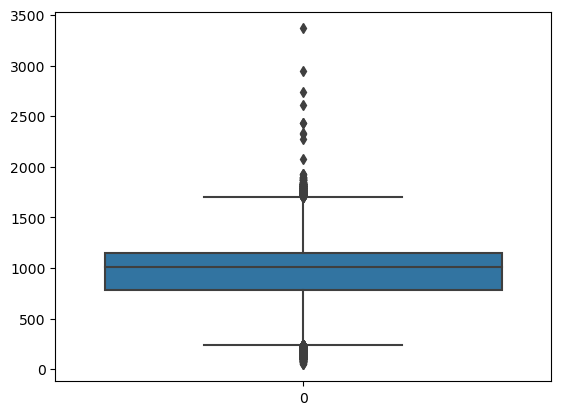

q1_balance


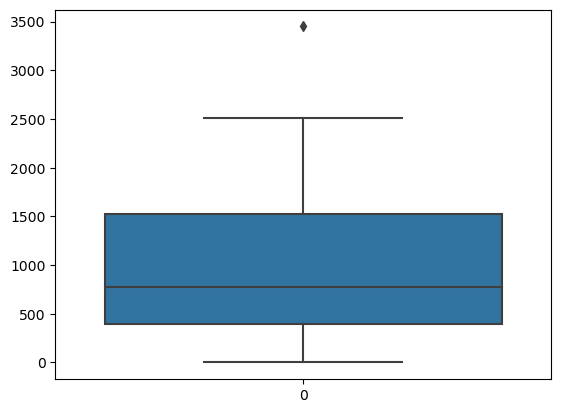

q2_balance


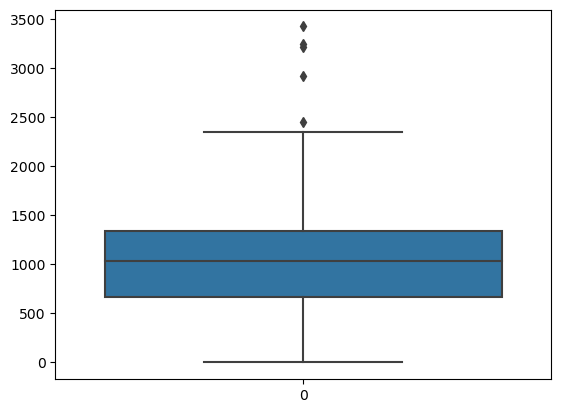

q3_balance


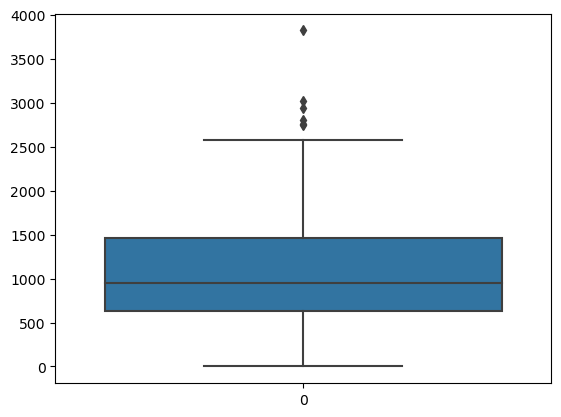

q4_balance


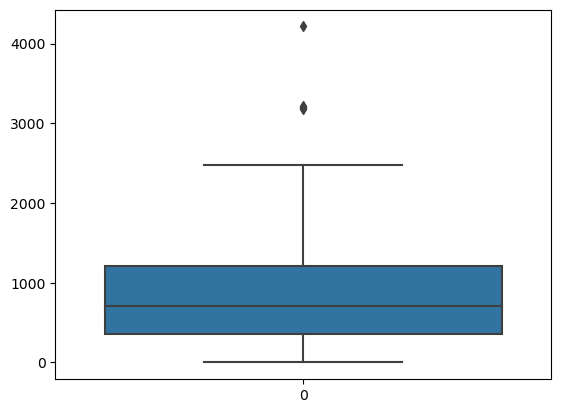

In [26]:
for col in data.select_dtypes(np.number).columns:
    print(col)
    sns.boxplot(data[col])
    plt.show()

average_balance


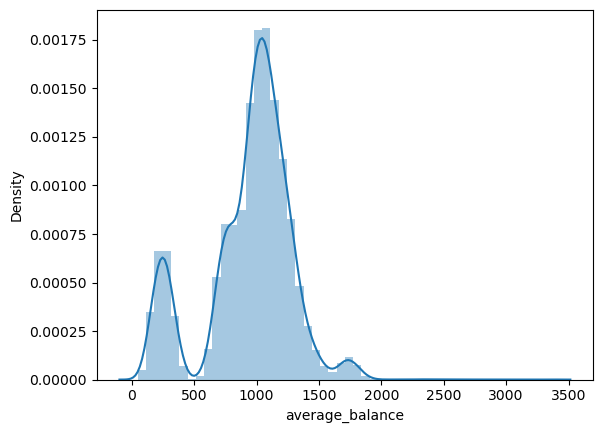

q1_balance


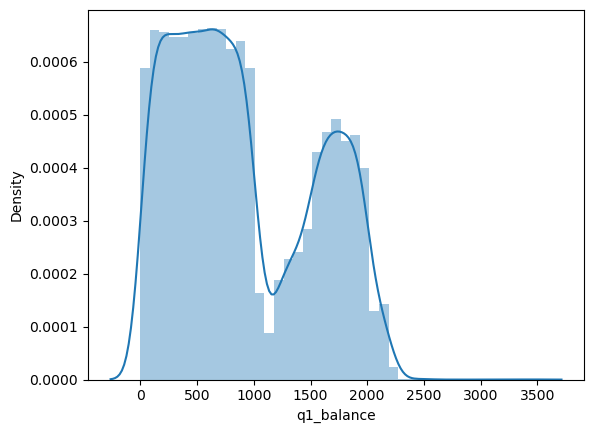

q2_balance


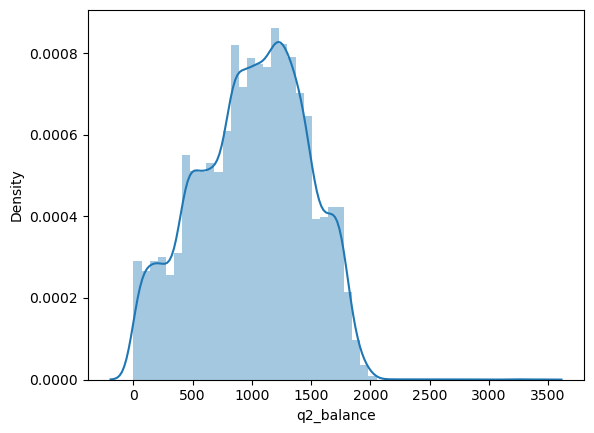

q3_balance


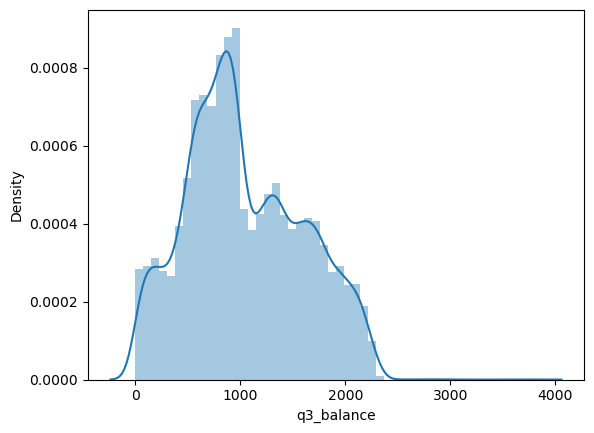

q4_balance


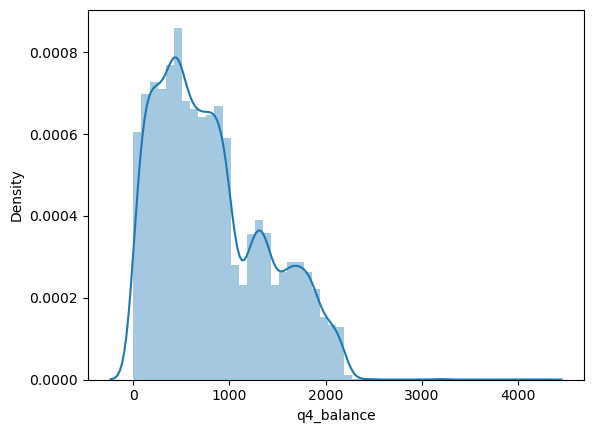

In [27]:
for col in data.select_dtypes(np.number).columns:
    print(col)
    sns.distplot(data[col])
    plt.show()

In [28]:
def power_transf(x):
    return np.sqrt(x)

def log_transf(x):
    return np.log(x+1)

def boxcox_transf(x):
    return pd.Series(stats.boxcox(x+1)[0])

# I added 1 to the log and boxcox transfomations so there will be no zeros. By doing this i don't change the distribution shape
# because every value will be added 1. The only thing that will happen is that the curve will be slightly moved to the right.

# I don't need to worry about negative numbers. This dataset doesn't have any negative numbers.

average_balance


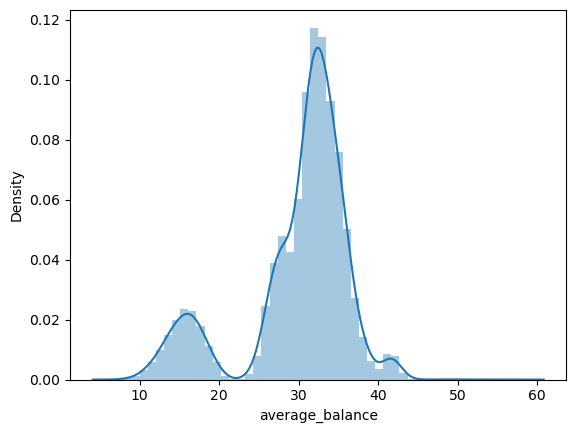

q1_balance


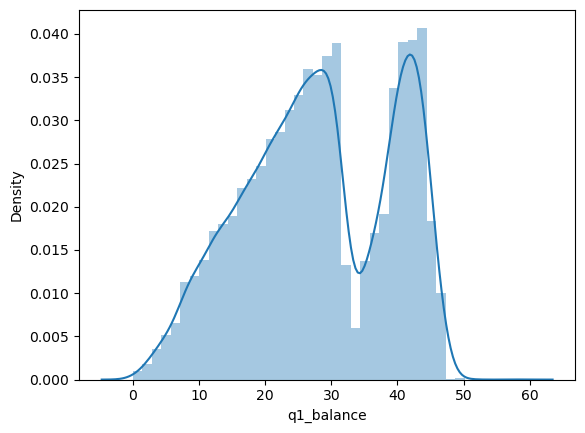

q2_balance


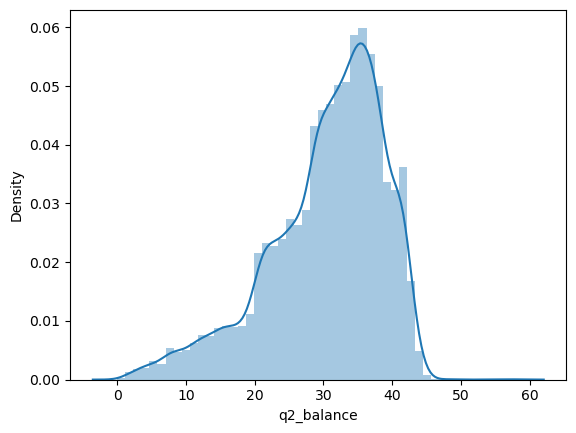

q3_balance


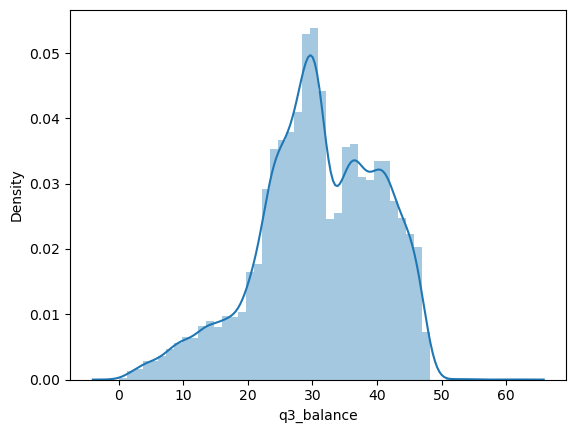

q4_balance


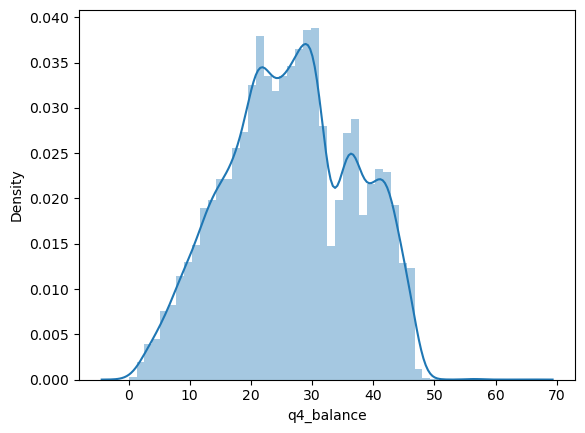

In [29]:
# Checking distributions after power transformation

for col in data.select_dtypes(np.number).columns:
    print(col)
    sns.distplot(power_transf(data[col]))
    plt.show()

average_balance


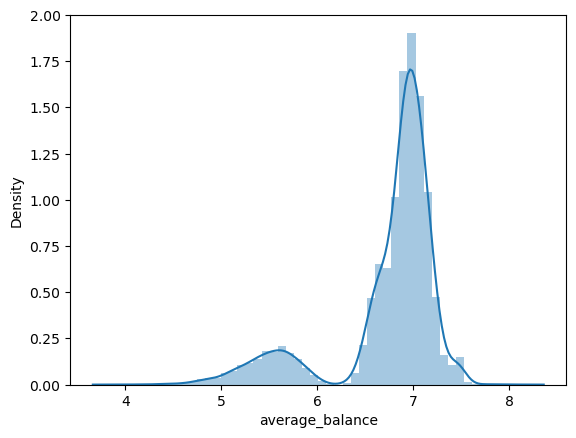

q1_balance


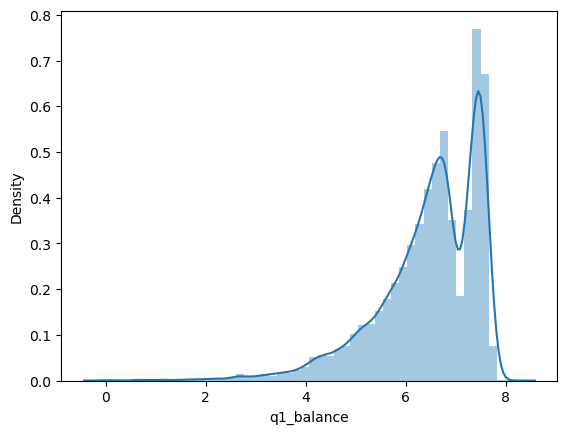

q2_balance


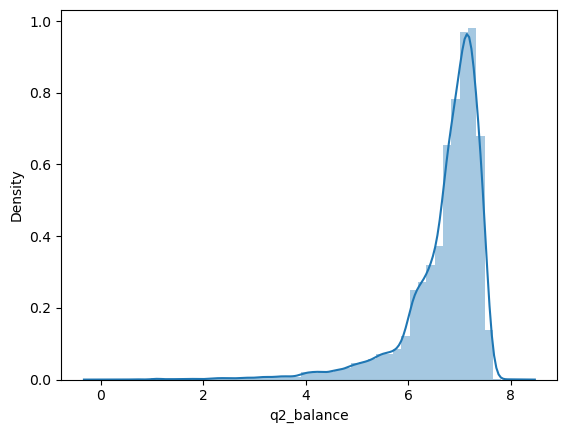

q3_balance


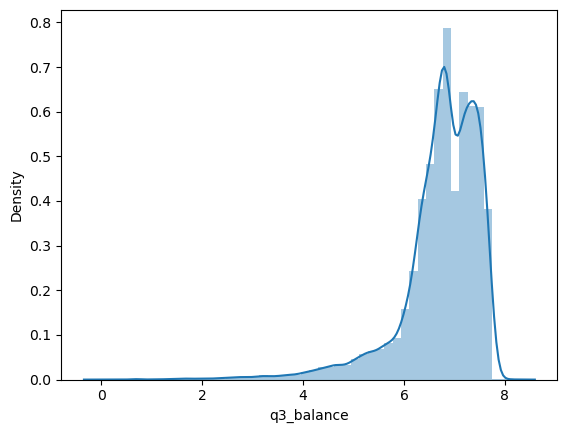

q4_balance


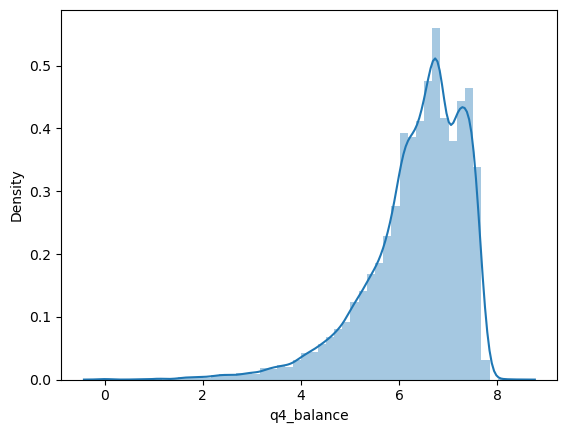

In [30]:
# Checking distributions after log transformation

for col in data.select_dtypes(np.number).columns:
    print(col)
    sns.distplot(log_transf(data[col]))
    plt.show()

average_balance


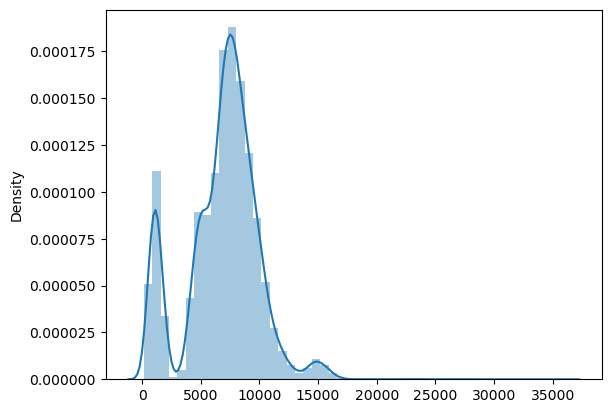

q1_balance


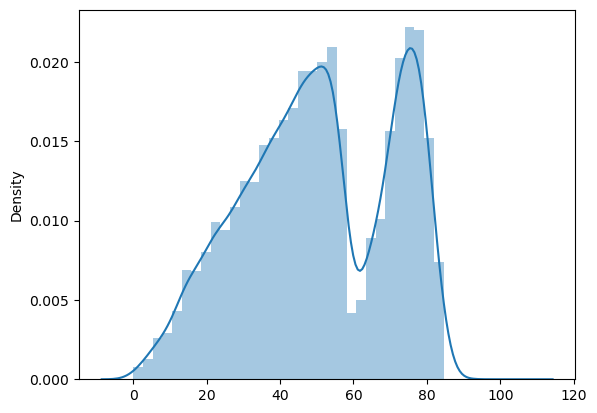

q2_balance


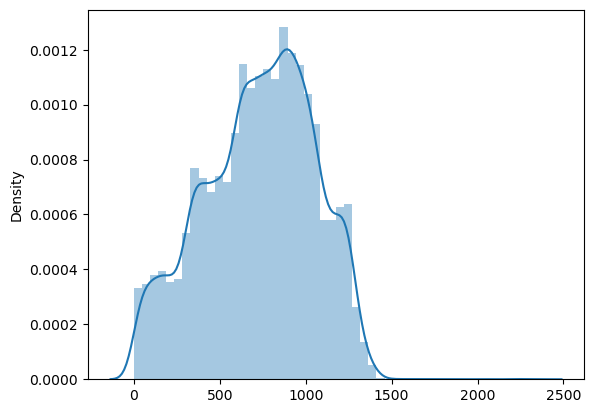

q3_balance


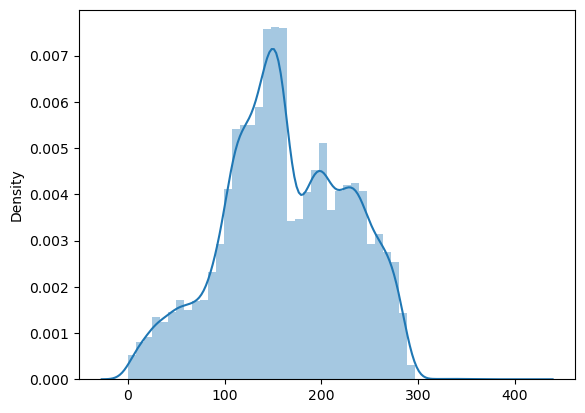

q4_balance


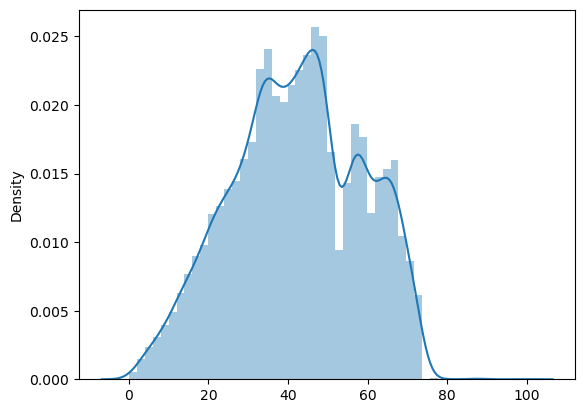

In [31]:
# Checking distributions after boxcox transformation

for col in data.select_dtypes(np.number).columns:
    print(col)
    sns.distplot(boxcox_transf(data[col]))
    plt.show()

In [32]:
# None of the transformations worked. I'll keep these columns as it is.

<Axes: >

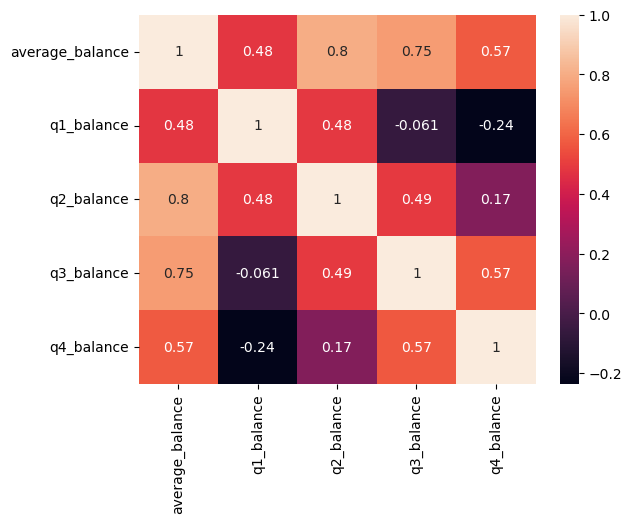

In [33]:
numericals = data.select_dtypes(np.number)
sns.heatmap(numericals.corr(), annot=True)

In [34]:
# looking at the correlation matrix there is no high correlation between the features

In [35]:
np.array(numericals)

array([[1160.75, 1669.  ,  877.  , 1095.  , 1002.  ],
       [ 147.25,   39.  ,  106.  ,   78.  ,  366.  ],
       [ 276.5 ,  367.  ,  352.  ,  145.  ,  242.  ],
       ...,
       [1087.25,  918.  ,  767.  , 1170.  , 1494.  ],
       [1022.25,  626.  ,  983.  ,  865.  , 1615.  ],
       [1056.  ,  265.  , 1378.  , 1978.  ,  603.  ]])

In [36]:
numericals.isna().sum()

average_balance    0
q1_balance         0
q2_balance         0
q3_balance         0
q4_balance         0
dtype: int64

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(numericals.shape[1]):
    vif = variance_inflation_factor(np.array(numericals), i)
    print("Vif for column", numericals.columns[i], "= ", vif)

Vif for column average_balance =  inf
Vif for column q1_balance =  inf
Vif for column q2_balance =  inf
Vif for column q3_balance =  inf
Vif for column q4_balance =  inf


In [38]:
numericals.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0


In [39]:
numericals['x'] = (numericals['q1_balance'] + numericals['q2_balance'] + numericals['q3_balance'] + numericals['q4_balance']) /4
numericals.head(10)

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,x
0,1160.75,1669.0,877.0,1095.0,1002.0,1160.75
1,147.25,39.0,106.0,78.0,366.0,147.25
2,276.50,367.0,352.0,145.0,242.0,276.50
3,1219.00,1578.0,1760.0,1119.0,419.0,1219.00
4,1211.00,2140.0,1357.0,982.0,365.0,1211.00
5,1114.75,1847.0,1365.0,750.0,497.0,1114.75
6,283.75,468.0,188.0,347.0,132.0,283.75
7,278.50,132.0,391.0,285.0,306.0,278.50
8,1005.00,894.0,891.0,882.0,1353.0,1005.00
9,974.25,1814.0,1454.0,514.0,115.0,974.25


In [40]:
numericals = numericals.drop(['average_balance', 'x'], axis=1)
numericals.head()

,q1_balance,q2_balance,q3_balance,q4_balance
0,1669.0,877.0,1095.0,1002.0
1,39.0,106.0,78.0,366.0
2,367.0,352.0,145.0,242.0
3,1578.0,1760.0,1119.0,419.0
4,2140.0,1357.0,982.0,365.0


In [41]:
for i in range(numericals.shape[1]):
    vif = variance_inflation_factor(np.array(numericals), i)
    print("Vif for column", numericals.columns[i], "= ", vif)

Vif for column q1_balance =  4.354688861452049
Vif for column q2_balance =  11.01021852011566
Vif for column q3_balance =  8.775199955412644
Vif for column q4_balance =  4.3887927871248795


In [42]:
clean_data = pd.concat([categoricals, numericals], axis=1)
clean_data.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2+,5+,Yes,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2+,No,Medium,2,1,2 or less,Yes,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2+,No,High,1,1,4,No,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,5+,Yes,2140.0,1357.0,982.0,365.0


## Balancing data

In [43]:
clean_data_yes = clean_data[clean_data['offer_accepted'] == 'Yes']
clean_data_yes.shape

(1021, 15)

In [44]:
clean_data_no = clean_data[clean_data['offer_accepted'] == 'No']
clean_data_no.shape

(16955, 15)

### Upsampling yes

In [45]:
clean_data_no.shape[0]

16955

In [46]:
data_yes_ups = clean_data_yes.sample(clean_data_no.shape[0], replace=True).reset_index(drop=True)
data_yes_ups.tail()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
16950,Yes,Air Miles,Letter,Low,2+,No,Medium,3+,1,4,Yes,134.0,462.0,215.0,463.0
16951,Yes,Air Miles,Letter,Low,2+,No,High,1,1,4,Yes,148.0,145.0,482.0,210.0
16952,Yes,Air Miles,Letter,Low,1,No,Low,2,2+,4,Yes,105.0,1229.0,2204.0,1494.0
16953,Yes,Air Miles,Postcard,Medium,1,Yes,Medium,3+,1,4,Yes,1971.0,1307.0,864.0,212.0
16954,Yes,Cash Back,Postcard,Low,2+,No,Low,1,2+,4,Yes,359.0,250.0,335.0,23.0


In [47]:
data_ups = pd.concat([data_yes_ups, clean_data_no], axis=0).reset_index(drop=True)
data_ups.shape

(33910, 15)

## Pre-processing

In [48]:
features = data_ups.drop('offer_accepted', axis=1)
target = data_ups['offer_accepted']

### Scaling

In [49]:
scaler = StandardScaler().fit_transform(features.select_dtypes(np.number))
scaled = pd.DataFrame(scaler)
scaled.head()

,0,1,2,3
0,1.433731,1.078518,-0.362361,-1.445141
1,-0.868150,1.777845,0.518796,1.720016
2,-0.708566,1.345652,1.489320,0.373563
3,1.162922,0.961239,-0.439217,-0.794445
4,1.707765,1.058971,0.243546,-1.023360


### Encoding

In [50]:
features.head()

,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
0,Cash Back,Postcard,Medium,2+,No,Low,2,1,3,No,1779.0,1493.0,848.0,11.0
1,Points,Postcard,Medium,1,No,Medium,1,1,3,Yes,351.0,1815.0,1341.0,1767.0
2,Air Miles,Postcard,Medium,2+,Yes,High,2,2+,4,No,450.0,1616.0,1884.0,1020.0
3,Air Miles,Postcard,High,1,No,Low,3+,2+,4,No,1611.0,1439.0,805.0,372.0
4,Points,Postcard,Medium,2+,No,Medium,1,1,2 or less,Yes,1949.0,1484.0,1187.0,245.0


In [51]:
encoder = OneHotEncoder(drop='first').fit_transform(features.select_dtypes(np.object)).toarray()
encoded = pd.DataFrame(encoder)
encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
features_consolidated = pd.concat([scaled, encoded], axis=1)
features_consolidated.head()

,0,1,2,3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.433731,1.078518,-0.362361,-1.445141,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.868150,1.777845,0.518796,1.720016,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.708566,1.345652,1.489320,0.373563,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.162922,0.961239,-0.439217,-0.794445,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,1.707765,1.058971,0.243546,-1.023360,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(features_consolidated, target, test_size=0.25, random_state=42)

## Logistic Regression

In [54]:
model_1 = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [55]:
predictions_1 = model_1.predict(X_test)

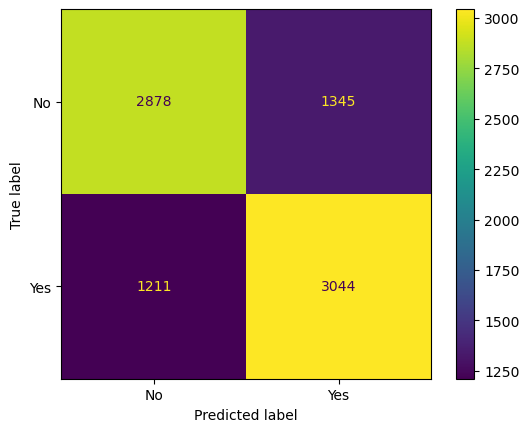

In [56]:
cm_1 = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_1), display_labels=['No', 'Yes']).plot()
cm_1

In [57]:
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(y_test, predictions_1).ravel()
(tn_1, fp_1, fn_1, tp_1)

(2878, 1345, 1211, 3044)

In [68]:
# metrics for 1st model

accuracy_1 = (tp_1 + tn_1) / len(y_test)
precision_1 = tp_1 / (tp_1 + fp_1)
sensitivity_1 = tp_1 / (tp_1 + fn_1)
specificity_1 = tn_1 / (fp_1 + tn_1)

print('Logistic Regression Metrics')
print('Accuracy = ', accuracy_1)
print('Precision = ', precision_1)
print('Sensitivity = ', sensitivity_1)
print('Specificity = ', specificity_1)

Logistic Regression Metrics
Accuracy =  0.6985138004246284
Precision =  0.6935520619731146
Sensitivity =  0.7153936545240893
Specificity =  0.6815060383613545


In [69]:
predictions_1_probs = model_1.predict_proba(X_test)[:,1]
predictions_1_probs

array([0.18508777, 0.27849847, 0.80475128, ..., 0.4631851 , 0.85404677,
       0.49466815])

In [70]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, predictions_1_probs, pos_label='Yes')

In [71]:
roc_auc_1 = auc(fpr1, tpr1)
roc_auc_1

0.7590907939928313

In [72]:
print(model_1.coef_)

[[-0.10808202  0.03032724  0.01425912 -0.03990143 -1.08689231 -0.35331284
   1.0032701   1.09118675  0.46966064 -0.02854776 -0.08236709  1.88490488
   0.83434734  0.05527256  0.02933428  0.05329061  0.17710833  0.09980527
  -0.00821924  0.03412518]]


## KNN

### K=10

In [73]:
model_2 = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

In [74]:
predictions_2 = model_2.predict(X_test)

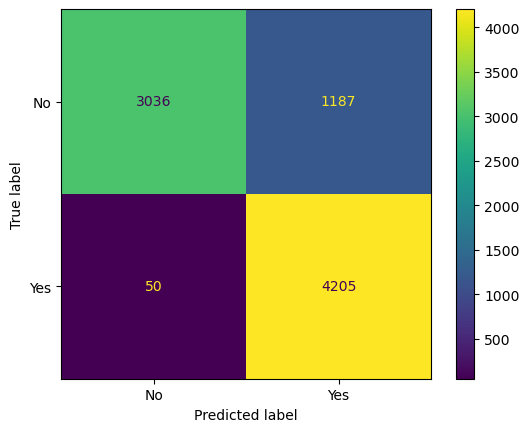

In [75]:
cm_2 = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_2), display_labels=['No', 'Yes']).plot()
cm_2

In [76]:
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(y_test, predictions_2).ravel()
(tn_2, fp_2, fn_2, tp_2)

(3036, 1187, 50, 4205)

In [77]:
# metrics for 2nd model

accuracy_2 = (tp_2 + tn_2) / len(y_test)
precision_2 = tp_2 / (tp_2 + fp_2)
sensitivity_2 = tp_2 / (tp_2 + fn_2)
specificity_2 = tn_2 / (fp_2 + tn_2)


print('KNN Metrics (K=10)')
print('Accuracy = ', accuracy_2)
print('Precision = ', precision_2)
print('Sensitivity = ', sensitivity_2)
print('Specificity = ', specificity_2)

KNN Metrics (K=10)
Accuracy =  0.8540929464496343
Precision =  0.7798590504451038
Sensitivity =  0.9882491186839013
Specificity =  0.718920198910727


In [78]:
predictions_2_probs = model_2.predict_proba(X_test)[:,1]

fpr2, tpr2, thresholds2 = roc_curve(y_test, predictions_2_probs, pos_label='Yes')

roc_auc_2 = auc(fpr2, tpr2)
roc_auc_2

0.9470137651988593

In [ ]:
# i'm suspicious that this model is highly overfitted

### K=20

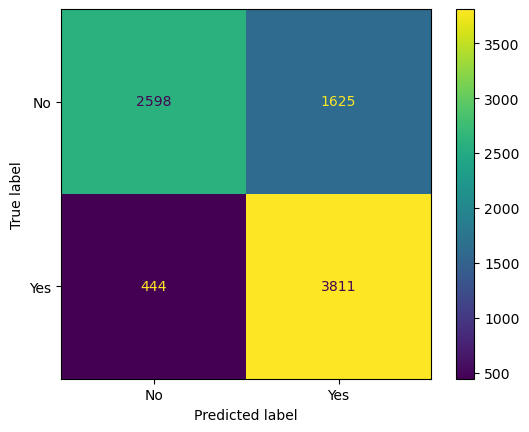

In [79]:
model_3 = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)

predictions_3 = model_3.predict(X_test)

cm_3 = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_3), display_labels=['No', 'Yes']).plot()
cm_3

In [80]:
tn_3, fp_3, fn_3, tp_3 = confusion_matrix(y_test, predictions_3).ravel()

# metrics for 3rd model

accuracy_3 = (tp_3 + tn_3) / len(y_test)
precision_3 = tp_3 / (tp_3 + fp_3)
sensitivity_3 = tp_3 / (tp_3 + fn_3)
specificity_3 = tn_3 / (fp_3 + tn_3)

print('KNN Metrics (K=20)')
print('Accuracy = ', accuracy_3)
print('Precision = ', precision_3)
print('Sensitivity = ', sensitivity_3)
print('Specificity = ', specificity_3)

KNN Metrics (K=20)
Accuracy =  0.7559565935362114
Precision =  0.7010669610007358
Sensitivity =  0.8956521739130435
Specificity =  0.6152024627042387


In [81]:
predictions_3_probs = model_3.predict_proba(X_test)[:,1]

fpr3, tpr3, thresholds3 = roc_curve(y_test, predictions_3_probs, pos_label='Yes')

roc_auc_3 = auc(fpr3, tpr3)
roc_auc_3

0.8512753309683165

In [83]:
# I stil think this model is overfitted, i'll use a for loop to find the best k value

In [82]:
accuracy = []
precision = []
sensitivity = []
specificity = []

for k in range(5,1000,50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy.append(model.score(X_test, y_test))
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    precision.append(tp / (tp + fp))
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (fp + tn))

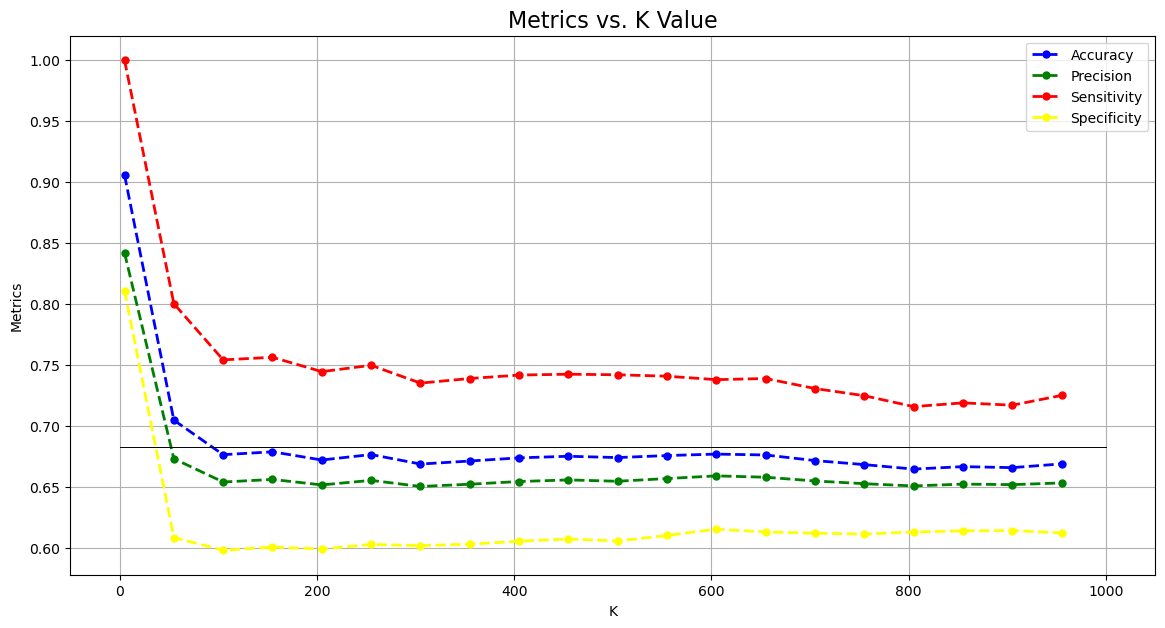

In [89]:
plt.figure(figsize=(14,7))
plt.plot(range(5,1000,50), accuracy, color='blue', linestyle='dashed', lw=2, label='Accuracy',
         marker='.', markerfacecolor='blue', markersize=10)
plt.plot(range(5,1000,50), precision, color='green', linestyle='dashed', lw=2, label='Precision',
         marker='.', markerfacecolor='green', markersize=10) 
plt.plot(range(5,1000,50), sensitivity, color='red', linestyle='dashed', lw=2, label='Sensitivity',
         marker='.', markerfacecolor='red', markersize=10)                       
plt.plot(range(5,1000,50), specificity, color='yellow', linestyle='dashed', lw=2, label='Specificity',
         marker='.', markerfacecolor='yellow', markersize=10)
plt.plot([0,1000], [0.683,0.683], color='k', lw=0.7) # plotting this line to help visualize wich k value has higher accuracy
plt.title('Metrics vs. K Value', fontsize=16)
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.grid()
plt.show()

In [117]:
# these are the points in the previous plot
for i in range(20):
    print(range(5,1000,50)[i], accuracy[i])

5 0.9058740268931351
55 0.7050011795234725
105 0.6766926161830621
155 0.6790516631280963
205 0.6723283793347488
255 0.6768105685303137
305 0.6690257136117008
355 0.6715027129039868
405 0.6740976645435244
455 0.6753951403632932
505 0.6743335692380278
555 0.6759849020995518
605 0.6771644255720689
655 0.6764567114885586
705 0.6718565699457419
755 0.668553904222694
805 0.664897381457891
855 0.66690257136117
905 0.6660769049304082
955 0.6691436659589526


In [118]:
# the value for k that gives a higher accuracy is around 155

In [119]:
accuracy = []
precision = []
sensitivity = []
specificity = []

for k in range(100,200,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy.append(model.score(X_test, y_test))
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    precision.append(tp / (tp + fp))
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (fp + tn))

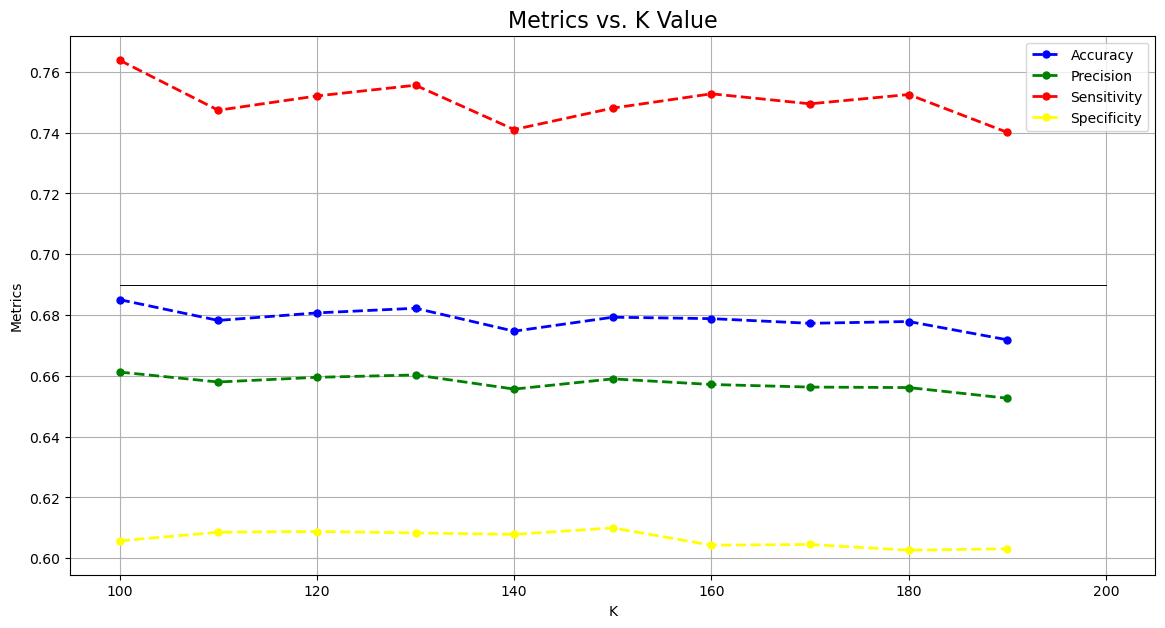

In [121]:
plt.figure(figsize=(14,7))
plt.plot(range(100,200,10), accuracy, color='blue', linestyle='dashed', lw=2, label='Accuracy',
         marker='.', markerfacecolor='blue', markersize=10)
plt.plot(range(100,200,10), precision, color='green', linestyle='dashed', lw=2, label='Precision',
         marker='.', markerfacecolor='green', markersize=10) 
plt.plot(range(100,200,10), sensitivity, color='red', linestyle='dashed', lw=2, label='Sensitivity',
         marker='.', markerfacecolor='red', markersize=10)                       
plt.plot(range(100,200,10), specificity, color='yellow', linestyle='dashed', lw=2, label='Specificity',
         marker='.', markerfacecolor='yellow', markersize=10)
plt.plot([100,200], [0.69,0.69], color='k', lw=0.7) # plotting this line to help visualize wich k value has higher accuracy
plt.title('Metrics vs. K Value', fontsize=16)
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.grid()
plt.show()

In [122]:
# these are the points in the previous plot
for i in range(10):
    print(range(100,200,10)[i], accuracy[i])

100 0.6850672328379335
110 0.6782259966973343
120 0.6807029959896201
130 0.6822363765038925
140 0.674687426279783
150 0.6792875678225997
160 0.6788157584335929
170 0.6772823779193206
180 0.6778721396555791
190 0.6718565699457419


In [108]:
# the value for k that gives a higher accuracy is somewhere between 100 and 130

In [124]:
accuracy = []
precision = []
sensitivity = []
specificity = []

for k in range(100,130):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy.append(model.score(X_test, y_test))
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    precision.append(tp / (tp + fp))
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (fp + tn))

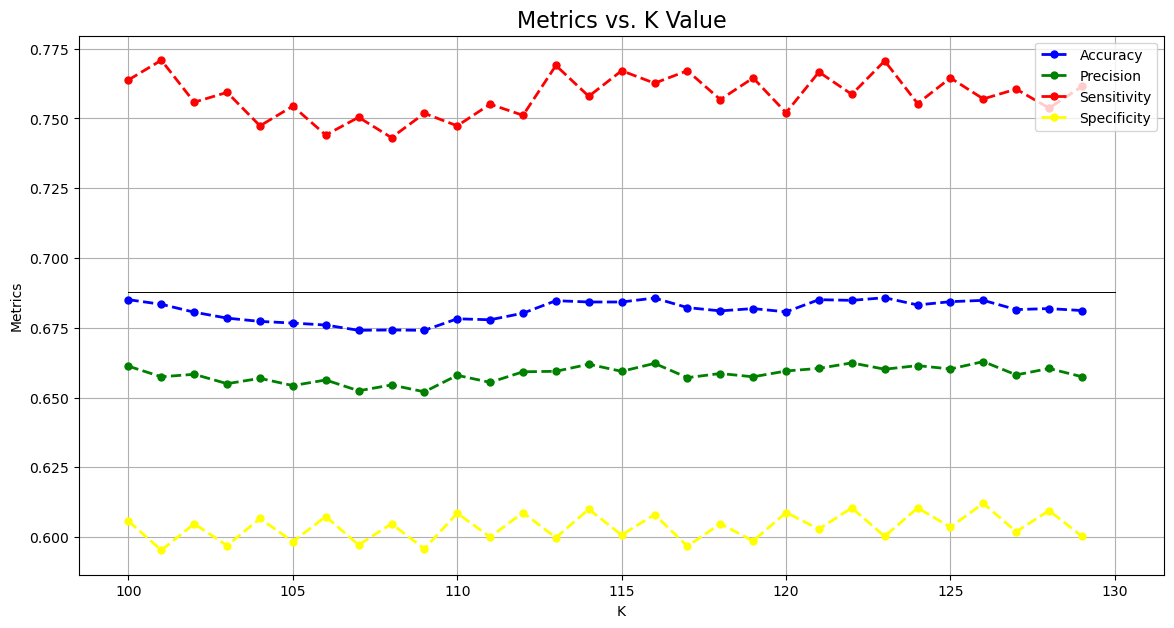

In [127]:
plt.figure(figsize=(14,7))
plt.plot(range(100,130), accuracy, color='blue', linestyle='dashed', lw=2, label='Accuracy',
         marker='.', markerfacecolor='blue', markersize=10)
plt.plot(range(100,130), precision, color='green', linestyle='dashed', lw=2, label='Precision',
         marker='.', markerfacecolor='green', markersize=10) 
plt.plot(range(100,130), sensitivity, color='red', linestyle='dashed', lw=2, label='Sensitivity',
         marker='.', markerfacecolor='red', markersize=10)                       
plt.plot(range(100,130), specificity, color='yellow', linestyle='dashed', lw=2, label='Specificity',
         marker='.', markerfacecolor='yellow', markersize=10)
plt.plot([100,130], [0.688,0.688], color='k', lw=0.7) # plotting this line to help visualize wich k value has higher accuracy
plt.title('Metrics vs. K Value', fontsize=16)
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.grid()
plt.show()

In [129]:
for i in range(30):
    print(range(100,130)[i], accuracy[i])

100 0.6850672328379335
101 0.6834158999764095
102 0.6805850436423685
103 0.6784619013918377
104 0.6772823779193206
105 0.6766926161830621
106 0.6759849020995518
107 0.6740976645435244
108 0.6742156168907761
109 0.6740976645435244
110 0.6782259966973343
111 0.6778721396555791
112 0.6802311866006133
113 0.6847133757961783
114 0.6842415664071715
115 0.6842415664071715
116 0.685656994574192
117 0.6822363765038925
118 0.6810568530313753
119 0.6818825194621373
120 0.6807029959896201
121 0.6850672328379335
122 0.6848313281434301
123 0.6857749469214437
124 0.6831799952819061
125 0.6843595187544232
126 0.6848313281434301
127 0.6815286624203821
128 0.6818825194621373
129 0.6811748053786271


In [130]:
# the value for k that gives a higher accuracy is 123

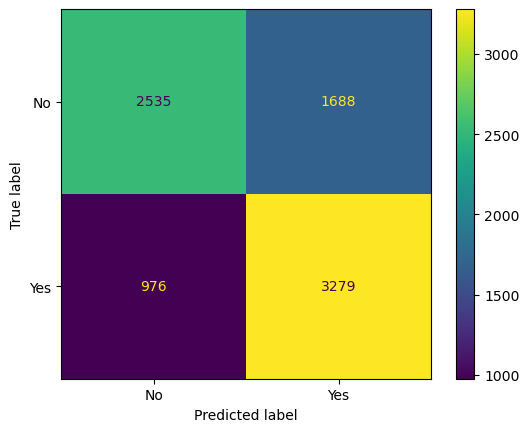

In [137]:
model_4 = KNeighborsClassifier(n_neighbors=123).fit(X_train, y_train)

predictions_4 = model_4.predict(X_test)

cm_4 = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_4), display_labels=['No', 'Yes']).plot()
cm_4

In [140]:
tn_4, fp_4, fn_4, tp_4 = confusion_matrix(y_test, predictions_4).ravel()

# metrics for 4rd model

accuracy_4 = (tp_4 + tn_4) / len(y_test)
precision_4 = tp_4 / (tp_4 + fp_4)
sensitivity_4 = tp_4 / (tp_4 + fn_4)
specificity_4 = tn_4 / (fp_4 + tn_4)

print('KNN Metrics (K=123)')
print('Accuracy = ', accuracy_4)
print('Precision = ', precision_4)
print('Sensitivity = ', sensitivity_4)
print('Specificity = ', specificity_4)

KNN Metrics (K=123)
Accuracy =  0.6857749469214437
Precision =  0.6601570364405074
Sensitivity =  0.7706227967097532
Specificity =  0.6002841581813876


In [141]:
predictions_4_probs = model_4.predict_proba(X_test)[:,1]

fpr4, tpr4, thresholds4 = roc_curve(y_test, predictions_4_probs, pos_label='Yes')

roc_auc_4 = auc(fpr4, tpr4)
roc_auc_4

0.7465689123937432

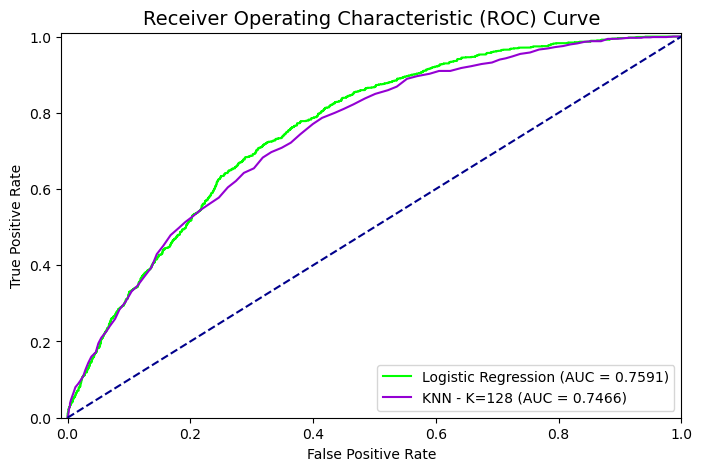

In [142]:
plt.figure(figsize=(8,5))
plt.plot(fpr1, tpr1, color='lime', label=f'Logistic Regression (AUC = {roc_auc_1:.4f})')
# plt.plot(fpr2, tpr2, color='r', label=f'KNN - K=10 (AUC = {roc_auc_2:.4f})')
# plt.plot(fpr3, tpr3, color='y', label=f'KNN - K=20 (AUC = {roc_auc_3:.4f})')
plt.plot(fpr4, tpr4, color='darkviolet', label=f'KNN - K=128 (AUC = {roc_auc_4:.4f})')
plt.plot([0,1], [0,1], color='darkblue', ls='--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0,1.01)
plt.xlim(-0.01,1)
plt.legend(loc='lower right')
plt.show()

## Conclusion

In [143]:
print('Logistic Regression Metrics')
print('Accuracy = ', accuracy_1)
print('Precision = ', precision_1)
print('Sensitivity = ', sensitivity_1)
print('Specificity = ', specificity_1,'\n')

print('KNN Metrics (K=123)')
print('Accuracy = ', accuracy_4)
print('Precision = ', precision_4)
print('Sensitivity = ', sensitivity_4)
print('Specificity = ', specificity_4)

Logistic Regression Metrics
Accuracy =  0.6985138004246284
Precision =  0.6935520619731146
Sensitivity =  0.7153936545240893
Specificity =  0.6815060383613545 

KNN Metrics (K=123)
Accuracy =  0.6857749469214437
Precision =  0.6601570364405074
Sensitivity =  0.7706227967097532
Specificity =  0.6002841581813876


The Logistic Regression has a little higher accuracy and ROC-AUC than KNN in this case. Althoug, KNN got a better sensitivity, wich is a good thing for this business case.

So, I think Logistic Regression would be a better choice for this case. Maybe if we try to change the threshold we could make the model perform even better in terms of accuracy (classification score) and sensitivity.